[SKIP SAVE] exists: Aloe_1_clean.csv


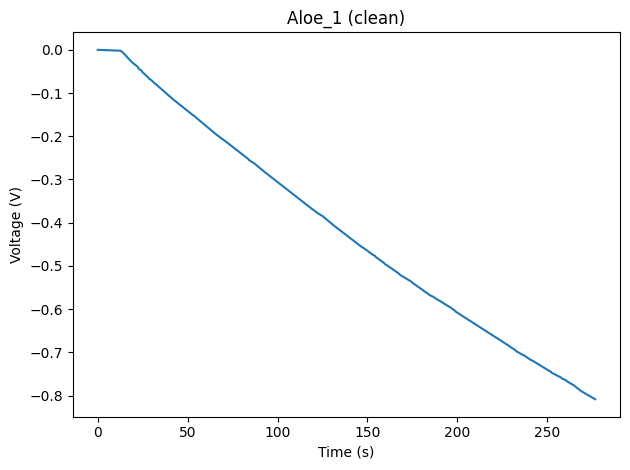

[SKIP SAVE] exists: Aloe_2_clean.csv


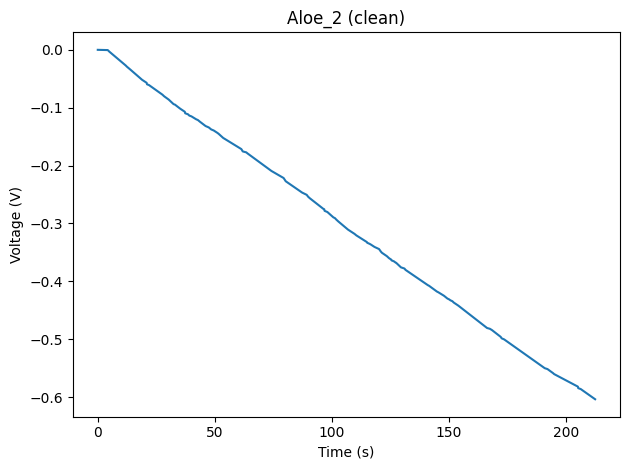

[SKIP SAVE] exists: Aloe_3_clean.csv


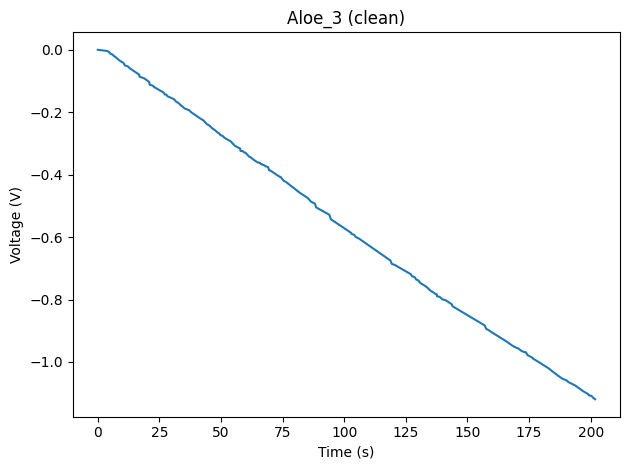

[SKIP SAVE] exists: Aloe_4_clean.csv


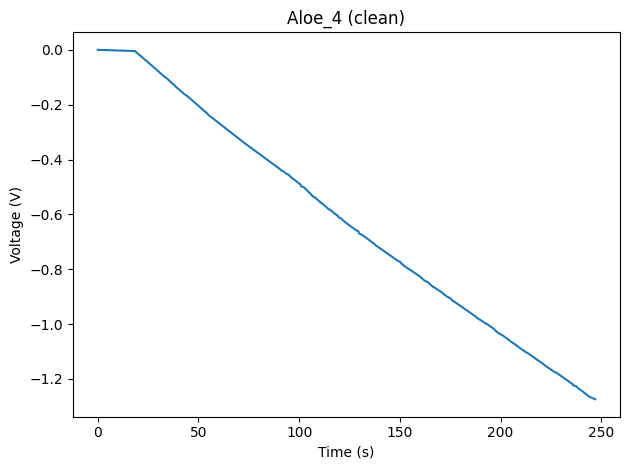

[SKIP SAVE] exists: Aloe_5_clean.csv


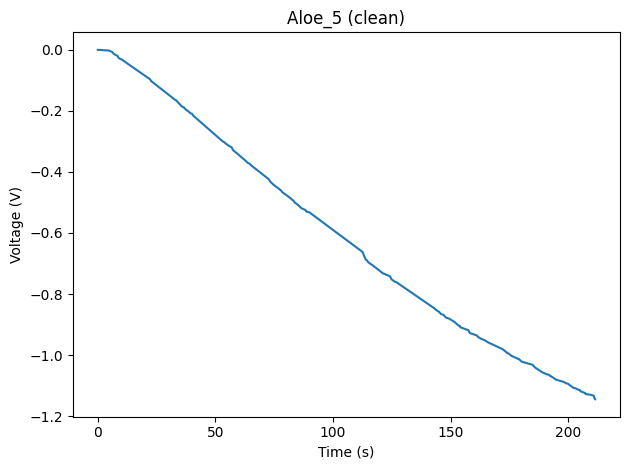

[SKIP SAVE] exists: Conv_1_clean.csv


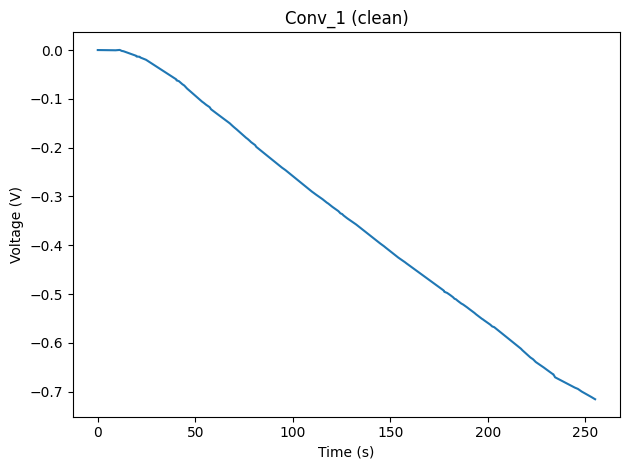

[SKIP SAVE] exists: Conv_2_clean.csv


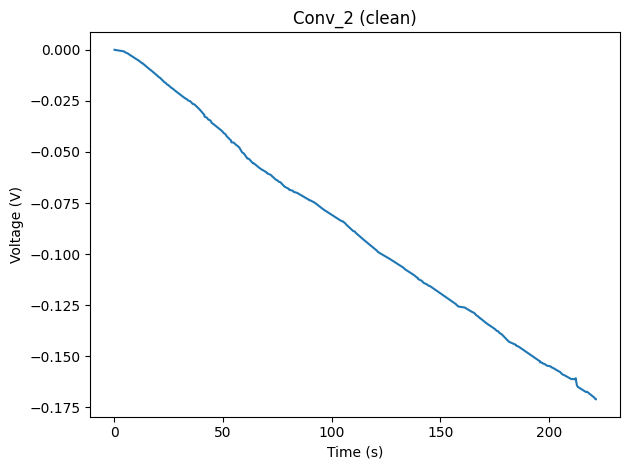

[SKIP SAVE] exists: Conv_3_clean.csv


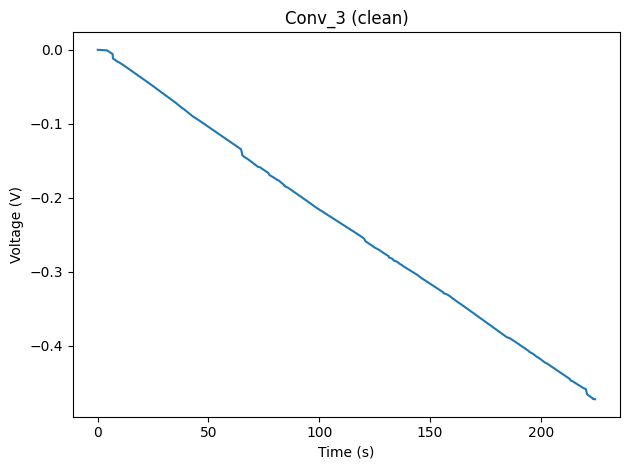

[SKIP SAVE] exists: Conv_4_clean.csv


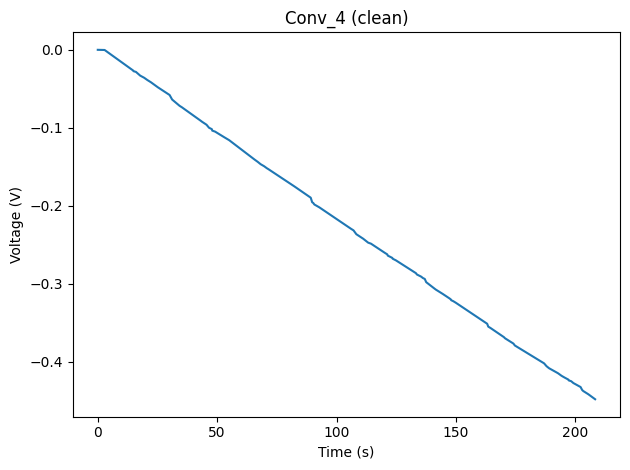

In [13]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# ===== 설정 =====
folder_path = r"C:\Users\user\Desktop\Drive파일\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\1. 실험자료\5. Revision experiment\260122_최종실험-일렉트로미터"
save_folder = os.path.join(folder_path, "clean_csv")
os.makedirs(save_folder, exist_ok=True)

# 폴더 최상위의 csv만 대상 (clean_csv 폴더 안은 자동 제외)
csv_files = sorted(glob.glob(os.path.join(folder_path, "*.csv")))
if not csv_files:
    raise FileNotFoundError(f"CSV 파일이 없습니다: {folder_path}")

def read_clean_timeseries(fp: str, encoding: str = "utf-8") -> pd.DataFrame:
    """
    22행 스킵 후 (idx, time, voltage) 읽고,
    idx가 숫자인 행만 남겨 요약행/문자행 제거,
    idx 기준 정렬 후 time-voltage 반환
    """
    df = pd.read_csv(
        fp,
        skiprows=22,
        header=None,
        usecols=[0, 1, 2],
        names=["idx", "time", "voltage"],
        encoding=encoding
    )

    df["idx"] = pd.to_numeric(df["idx"], errors="coerce")
    df["time"] = pd.to_numeric(df["time"], errors="coerce")
    df["voltage"] = pd.to_numeric(df["voltage"], errors="coerce")

    df = df.dropna(subset=["idx", "time", "voltage"]).copy()
    df = df.sort_values("idx")

    return df[["time", "voltage"]]

for fp in csv_files:
    base = os.path.splitext(os.path.basename(fp))[0]

    # ===== 안전장치 1: 파일명이 이미 _clean 이면 스킵 =====
    if base.lower().endswith("_clean"):
        print(f"[SKIP] already cleaned name: {os.path.basename(fp)}")
        continue

    save_path = os.path.join(save_folder, f"{base}_clean.csv")

    # ===== 안전장치 2: 결과 파일이 이미 있으면 스킵(재가공 방지) =====
    already_cleaned = os.path.exists(save_path)

    # 1) 자동 필터링해서 깔끔한 시계열 데이터 만들기
    # encoding 이슈 대비: utf-8 실패하면 cp949 재시도
    try:
        clean_df = read_clean_timeseries(fp, encoding="utf-8")
    except UnicodeDecodeError:
        clean_df = read_clean_timeseries(fp, encoding="cp949")

    # 1) 저장 (이미 수정되어 있으면 skip)
    if already_cleaned:
        print(f"[SKIP SAVE] exists: {os.path.basename(save_path)}")
    else:
        clean_df.to_csv(save_path, index=False)
        print(f"[SAVE] {save_path}")

    # 2) 깔끔한 시계열 데이터 plot으로 보여주기
    plt.figure()
    plt.plot(clean_df["time"], clean_df["voltage"])
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title(f"{base} (clean)")
    plt.tight_layout()
    plt.show()
